In [1]:
# Section 0: Visualization

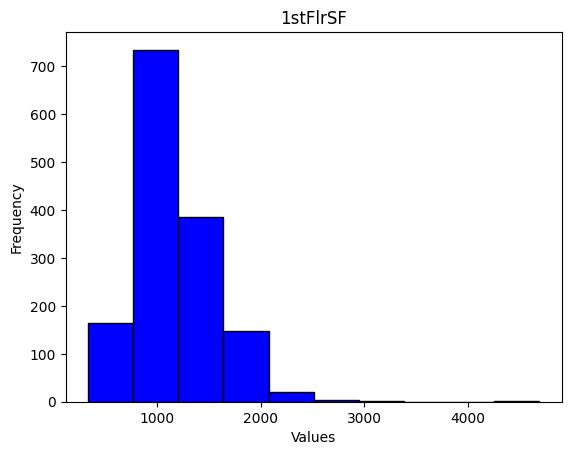

In [2]:
# Visualize a continuous feature (1stFlrSF)
# Other examples of continuous: 2ndFlrSF, LotArea
import housing_prices

housing_prices.plot_distribution_of_continuous("1stFlrSF")

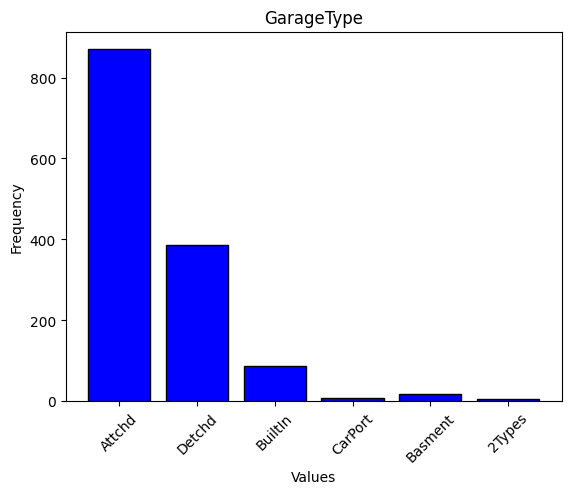

In [3]:
# Visualize a categorical feature (GarageType)
# Other examples of categorical: CentralAir, HeatingQC
import housing_prices

housing_prices.plot_distribution_of_categorical("GarageType")

In [4]:
# Section 1: Dealing with missing values

In [5]:
# I followed through Kaggle's courses for data cleaning and feature engineering
# and applied it to our project
import pandas as pd
import numpy as np

data = pd.read_csv("./data/train.csv")

np.random.seed(0)


In [6]:
# check for missing attributes
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# actually calculate missing data points
missing_count = data.isnull().sum()

missing_count[0:10]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [8]:
# get percent of values missing
total_cells = np.prod(data.shape)
total_missing = missing_count.sum()

percent_missing = (total_missing/total_cells)*100
print(percent_missing)

6.620158971757145


In [9]:
# get names of columns with missing values
for name,count in missing_count.items():
    if count > 0:
        print(name)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [10]:
# determine if missing values are actually missing (like person forgot to record it)
# or because it wasn't recorded because its 0 or some default (imputation)
# Actually missing: LotFrontage, Electrical, 
# Not recorded: MasVnrType, MasVnrArea, GarageYrBlt, GarageFinish
    # MasVnrType: NA should be None
    # MasVnrArea: NA should be 0
    # GarageYrBlt: NA is because there is no garage... 0? But this does not really make sense
# Special cases where NA is actual a valid input: Alley, BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

In [11]:
# Explicitly turn special cases where NA is valid input into "None"
special_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
               ]

data[special_cols] = data[special_cols].fillna("None")

In [12]:
# Fill in not recorded values
data['MasVnrType'] = data['MasVnrType'].fillna('None')

data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [13]:
# See how many missing values in columns with actually missing values
missing1 = data.loc[:, 'LotFrontage'].isnull().sum()
missing2 = data.loc[:, 'Electrical'].isnull().sum()
print(missing1, missing2)

259 1


In [14]:
# Remove missing columns with many missing values and remove the single row that is missing
data = data.drop('LotFrontage', axis=1)
data = data.dropna(subset=['Electrical'])

In [15]:
# Save and verify missing percentage
data.to_csv('handle_missing.csv')
missing_count = data.isnull().sum()
total_cells = np.prod(data.shape)
total_missing = missing_count.sum()

percent_missing = (total_missing/total_cells)*100
print(percent_missing)

0.0


In [16]:
# Section 3: Dealing with Categorical Values

In [17]:
# The two main methods are going to be target-encoding and one-hot encoding.
# Use target-encoding when one-hot is not feasable (high-cardinality)

In [18]:
# Get all categorical columns
categorical_cols = list(data.select_dtypes(include=['object','category']).columns)

additional_categorical_cols = ['MSSubClass']
data['MSSubClass'] = data['MSSubClass'].astype(str)
print(data['MSSubClass'].dtype)

all_categorical_cols = categorical_cols + additional_categorical_cols
print(all_categorical_cols)

object
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


In [19]:
# Get cardinality of each categorical column
cardinality = data[all_categorical_cols].nunique()
print(cardinality)

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
MSSubClass       15
dtype: int64


In [20]:
# Do target encoding on high cardinality categorical attributes
# Neighborhood, Exterior1st, Exterior2nd, MSSubClass

data["Neighborhood_encoded"] = data.groupby("Neighborhood")["SalePrice"].transform("mean")
data["Exterior1st_encoded"] = data.groupby("Exterior1st")["SalePrice"].transform("mean")
data["Exterior2nd_encoded"] = data.groupby("Exterior2nd")["SalePrice"].transform("mean")
data["MSSubClass_encoded"] = data.groupby("MSSubClass")["SalePrice"].transform("mean")

data[["MSSubClass", "SalePrice", "MSSubClass_encoded"]].head(10)

,MSSubClass,SalePrice,MSSubClass_encoded
0,60,208500,239948.501672
1,20,181500,185224.811567
2,60,223500,239948.501672
3,70,140000,166772.416667
4,60,250000,239948.501672
5,50,143000,143302.972222
6,20,307000,185224.811567
7,60,200000,239948.501672
8,50,129900,143302.972222
9,190,118000,129613.333333


In [21]:
# Visualize distribution of SalePrice in rare categories within each of the following attributes
# Neighborhood, Exterior1st, Exterior2nd, MSSubClass

# and also generate m values for smoothing

columns_to_check = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass']
rare_threshold = 10

m_values = {}

for col in columns_to_check:
    counts = data[col].value_counts()
    rare_categories = counts[counts <= rare_threshold].index
    rare_data = data[data[col].isin(rare_categories)]
    
    summary = rare_data.groupby(col)['SalePrice'].agg(['count', 'std', 'mean', lambda x: x.std() / x.mean()])
    suggested_m = summary['<lambda_0>'].apply(lambda cv: 4 if pd.isna(cv) else 0.2 if cv < 0.1 else 0.5 if cv < 0.2 else 1 if cv < 0.3 else 2 if cv < 0.4 else 4)
    
    m_values[col] = suggested_m.to_dict()

print(m_values)

{'Neighborhood': {'Blueste': 0.5, 'NPkVill': 0.2}, 'Exterior1st': {'AsphShn': 4.0, 'BrkComm': 1.0, 'CBlock': 4.0, 'ImStucc': 4.0, 'Stone': 0.5}, 'Exterior2nd': {'AsphShn': 1, 'Brk Cmn': 2, 'CBlock': 4, 'ImStucc': 4, 'Other': 4, 'Stone': 4}, 'MSSubClass': {'180': 1, '40': 4}}


In [22]:
# Apply smoothing and drop original non-encoded column

global_mean = data['SalePrice'].mean()
target = 'SalePrice'
default_m = 0.2

def smoothed_target_encoding(feature):
    encoded_col = feature + '_encoded'
    categories = data[feature].unique()
    counts = data[feature].value_counts()
    for category in categories:
        m = m_values[feature].get(category, default_m)
        n = counts.get(category, 0)
        category_mean = data.loc[data[feature] == category, target].mean()
        weight = n/(n+m)
        smoothed_value = weight * category_mean + (1-weight) * global_mean
        data.loc[data[feature] == category, encoded_col] = smoothed_value
    print(data[encoded_col].head())

for col in columns_to_check:
    smoothed_target_encoding(col) 

0    197943.089740
1    237739.828478
2    197943.089740
3    210508.732011
4    334545.972790
Name: Neighborhood_encoded, dtype: float64
0    213810.054607
1    149450.795091
2    213810.054607
3    149871.799607
4    213810.054607
Name: Exterior1st_encoded, dtype: float64
0    214512.412717
1    149832.236596
2    214512.412717
3    161431.572748
4    214512.412717
Name: Exterior2nd_encoded, dtype: float64
0    239909.051066
1    185223.209771
2    239909.051066
3    166819.453139
4    239909.051066
Name: MSSubClass_encoded, dtype: float64


In [23]:
# One-hot encode remaining categorical attributes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categoricals_to_OHE = set(all_categorical_cols)-set(columns_to_check)

for feature in categoricals_to_OHE:
    encoded = encoder.fit_transform(data[[feature]])
    encoded_df = pd.DataFrame(
        encoded,
        columns=encoder.get_feature_names_out([feature]),
        index=data.index
    )
    data = pd.concat([data, encoded_df], axis=1)

data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_None,Utilities_AllPub,Utilities_NoSeWa,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


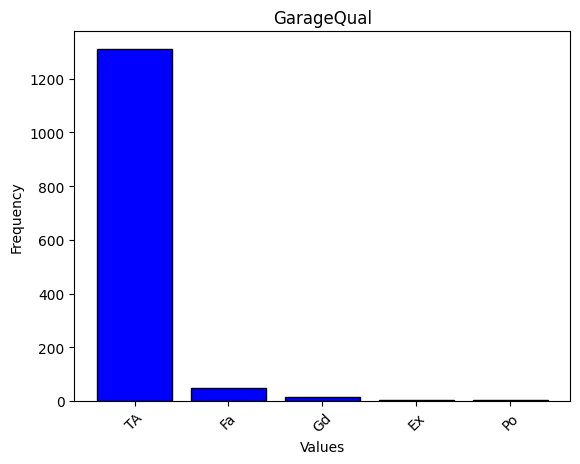

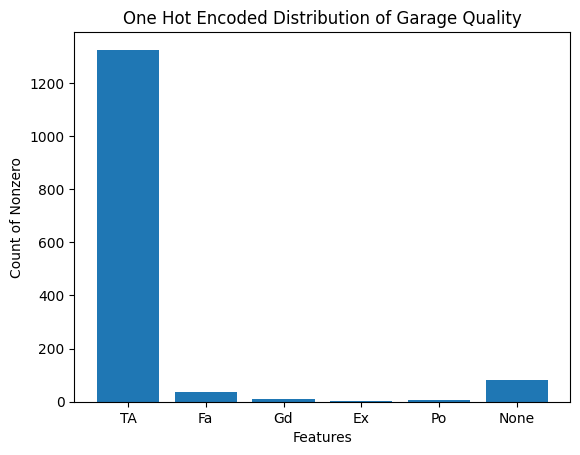

In [24]:
# Visualize one example of OHE
# Original: GarageQual
# OHEs: GarageQual_Ex, GarageCond_Fa, GarageCond_Gd, GarageCond_None, GarageCond_Po, GarageCond_TA
import housing_prices
from matplotlib import pyplot as plt

# This function uses original data before any preprocessing
housing_prices.plot_distribution_of_categorical("GarageQual")

garage_ex = (data["GarageQual_Ex"] != 0).sum()
garage_gd = (data["GarageCond_Gd"] != 0).sum()
garage_ta = (data["GarageCond_TA"] != 0).sum()
garage_fa = (data["GarageCond_Fa"] != 0).sum()
garage_po = (data["GarageCond_Po"] != 0).sum()
garage_none = (data["GarageCond_None"] != 0).sum()

plt.bar(["TA","Fa","Gd","Ex","Po","None"],[garage_ta,garage_fa,garage_gd,garage_ex,garage_po,garage_none])
plt.ylabel("Count of Nonzero")
plt.xlabel("Features")
plt.title("One Hot Encoded Distribution of Garage Quality")
plt.show()

In [25]:
# Remove old categorical data
data = data.drop(columns=all_categorical_cols, errors='ignore')
data.head()
data.to_csv('handle_categorical.csv', index=False)

In [26]:
# Section 4: Mutual Information

In [27]:
# Utility functions from Kaggle tutorial
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [28]:
# Prepare data for MI
X = data.copy().drop(columns=["SalePrice"])
y = data["SalePrice"]


In [29]:
# Perform mutual information
mi_scores = make_mi_scores(X, y)
mi_scores[::3] 

OverallQual           0.565867
YearBuilt             0.377033
GarageCars            0.359527
ExterQual_TA          0.260112
YearRemodAdd          0.246621
                        ...   
LandSlope_Mod         0.000000
BldgType_TwnhsE       0.000000
LotConfig_FR2         0.000000
GarageQual_Ex         0.000000
GarageType_CarPort    0.000000
Name: MI Scores, Length: 83, dtype: float64

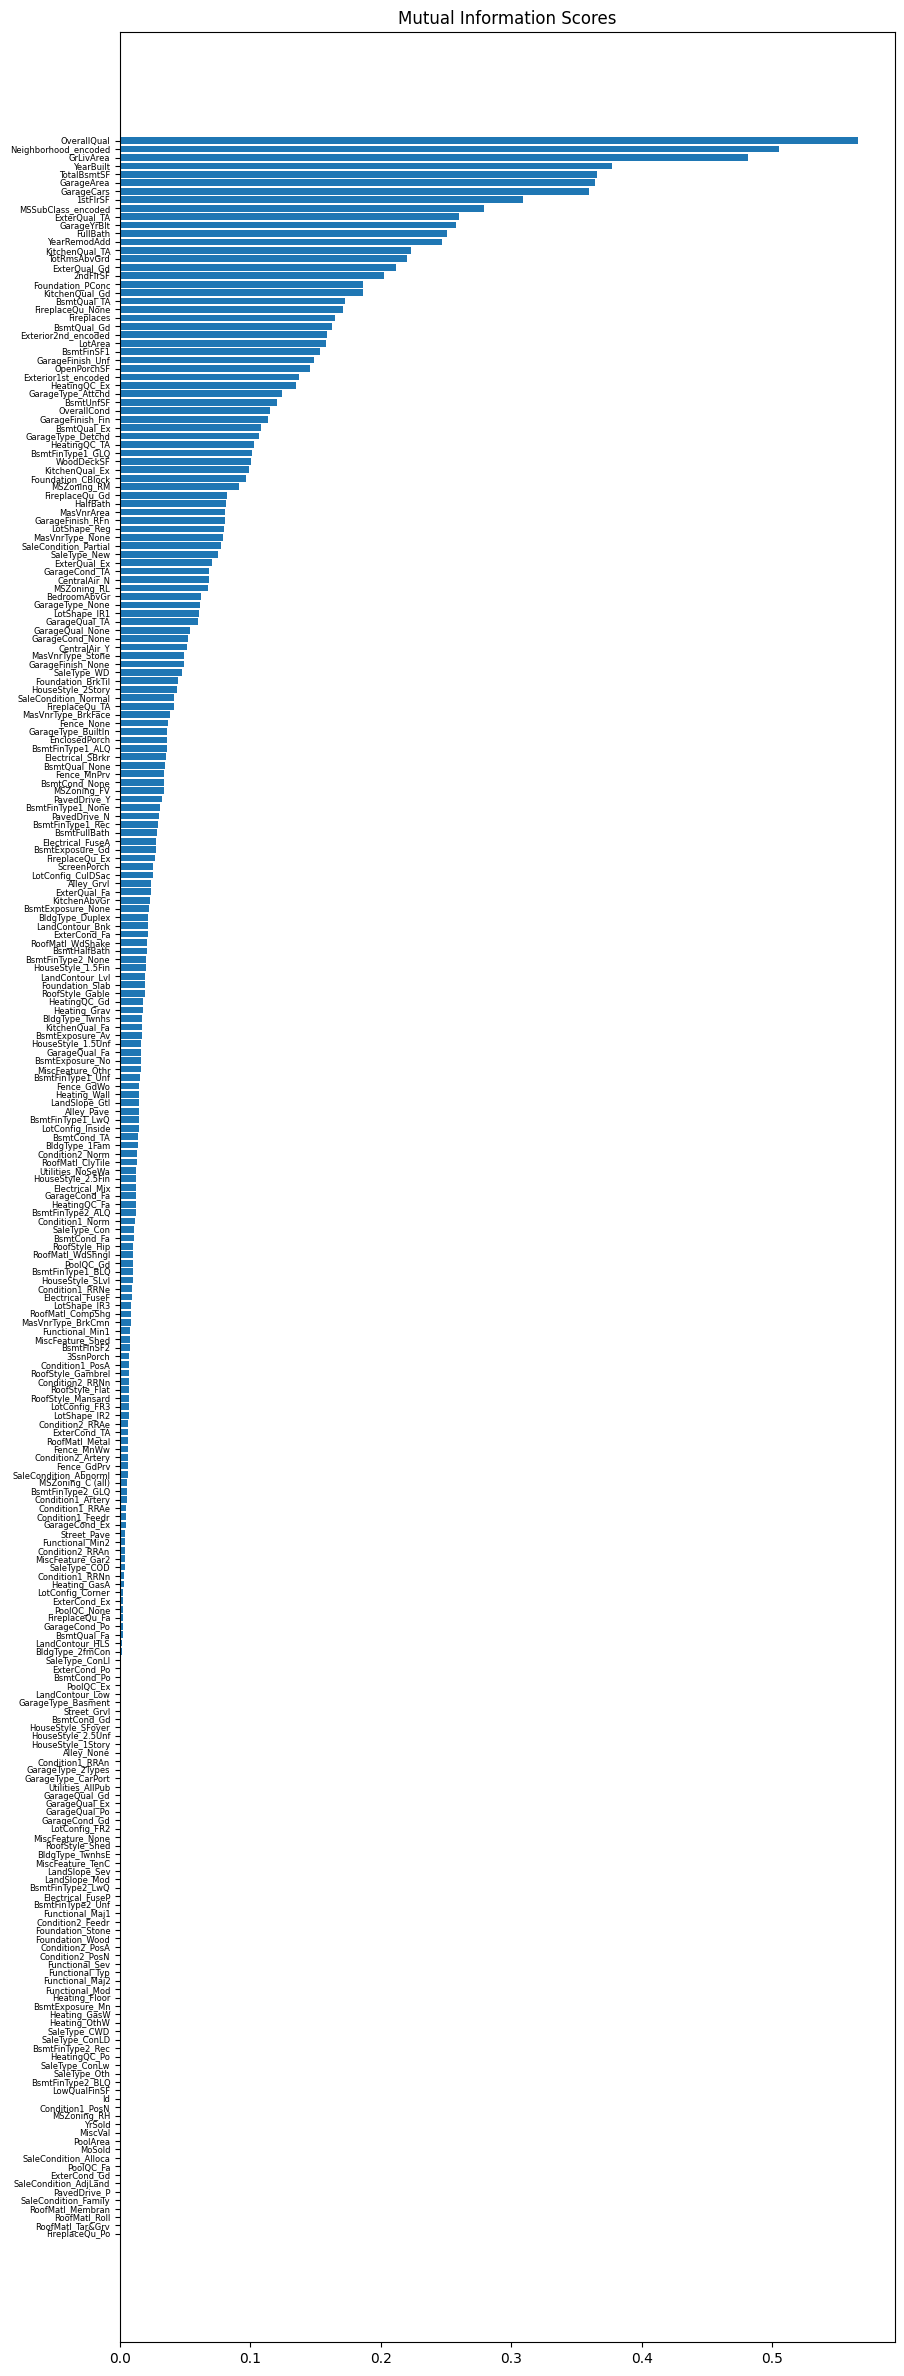

In [30]:
# Plot MI scores
plt.figure(dpi=100, figsize=(10, 30))  # more height for labels
plt.tick_params(axis="y", labelsize=6)  # smaller text
plot_mi_scores(mi_scores)

In [59]:
# Choose top-k MI features
# I will try k = 10, 20, 30, 40, 50
# So for now, extract top 50

k=50
top_features = mi_scores.head(k).index.tolist()
top_50_features = data[top_features]

print(top_50_features.shape)
top_50_features.head()
top_50_features.to_csv("handle_MI.csv", index=False)

(1459, 50)


In [32]:
# Section 5: Creating features
# Tips by Kaggle suggest to try (sensible) ratio combinations for easy performance gains.
# Sums and differences are usually learned by the linear model.

In [33]:
# Add back in features that I think are related (domain-wise) to current top-k

# YearBuilt and GarageYrBlt and YearRemodAdd probably also relate on when the
# house was sold (since it makes sense that people think about "how long has it been since built")
# which depends on YrSold
top_50_features += data["YrSold"]

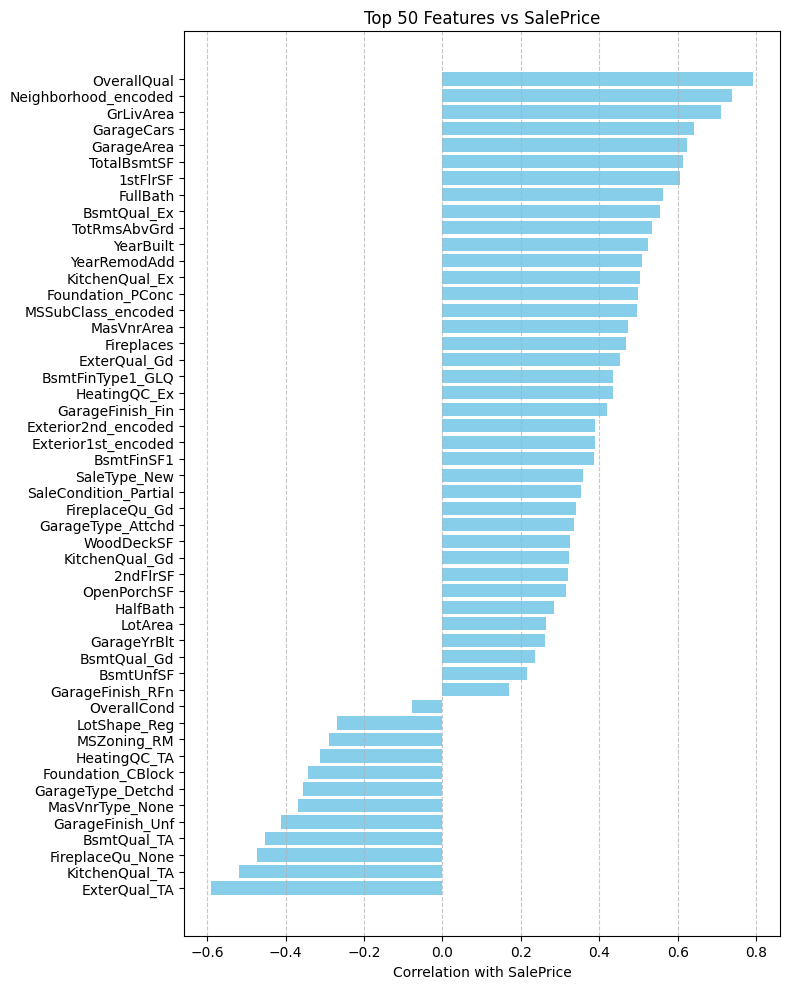

In [61]:
# Visualize heatmap of top-k features
corr_with_target = top_50_features.corrwith(data["SalePrice"]).sort_values()

plt.figure(figsize=(8, 10))  
plt.barh(corr_with_target.index, corr_with_target.values, color='skyblue')
plt.xlabel("Correlation with SalePrice")
plt.title("Top 50 Features vs SalePrice")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

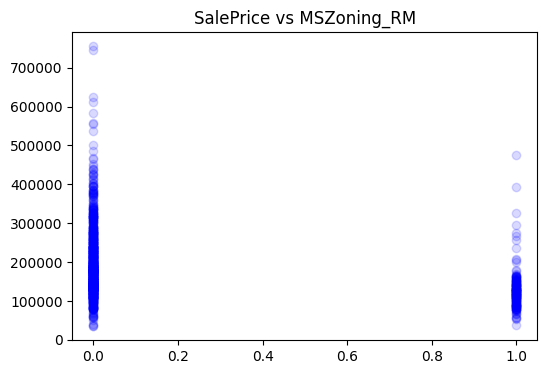

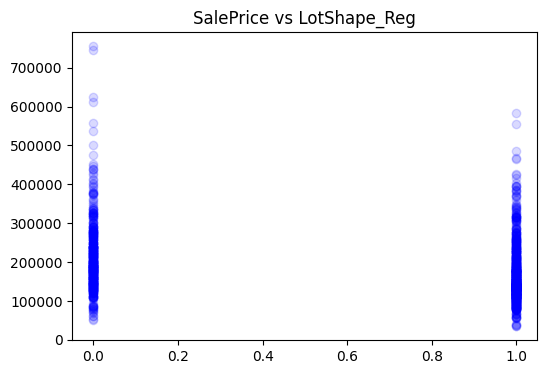

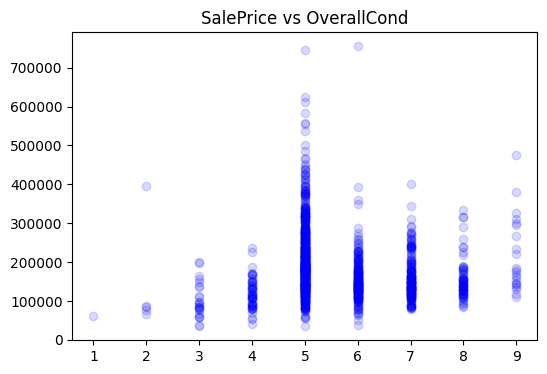

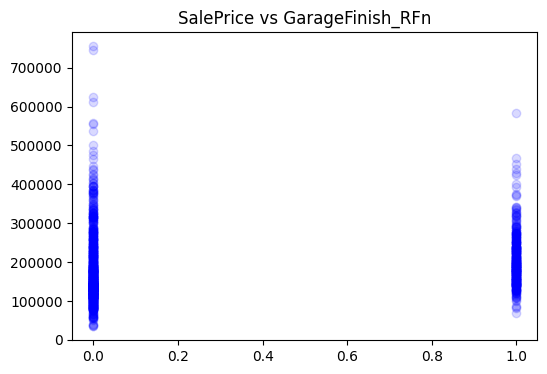

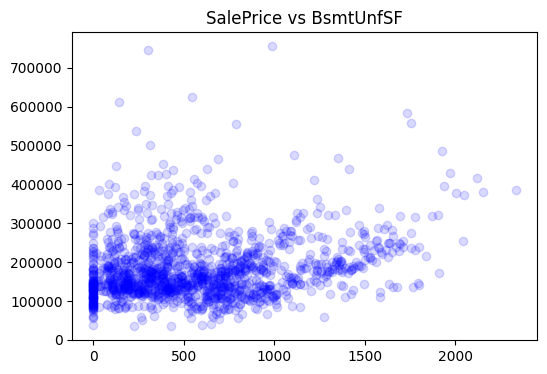

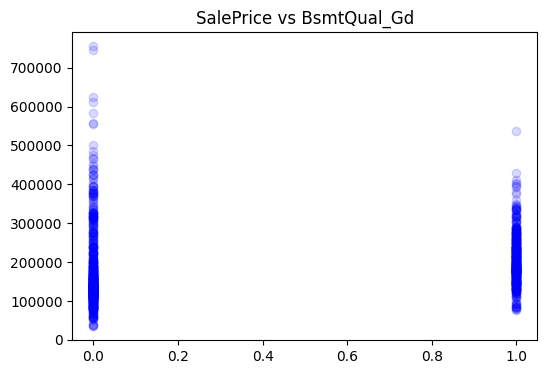

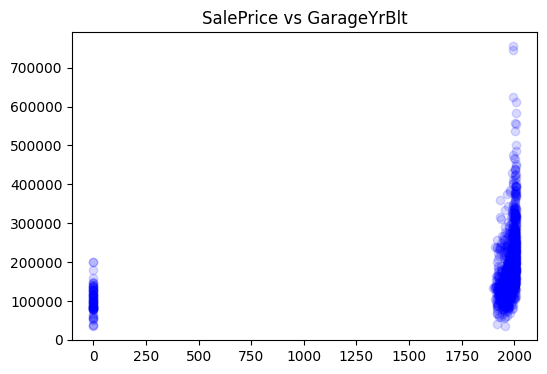

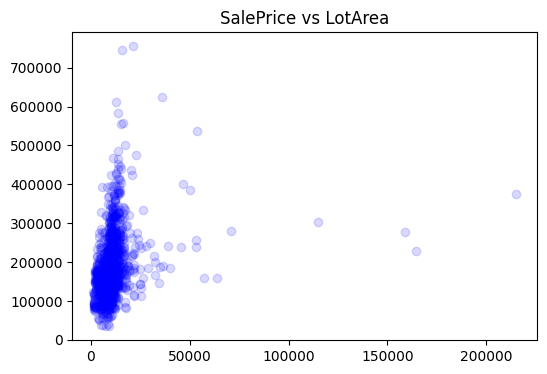

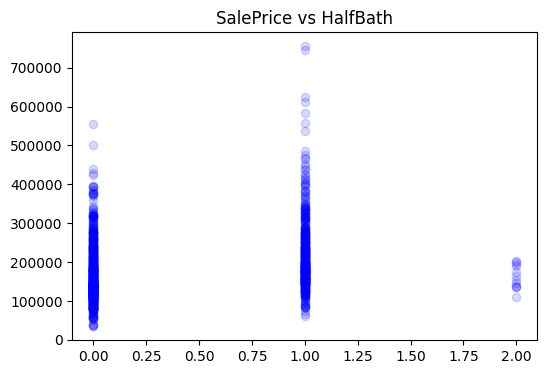

In [65]:
# Visualize features with correlation close to 0
# Since, they have high(ish) MI, there might be a non-linear correlation

low_corr_features = corr_with_target[abs(corr_with_target) < 0.3].index.tolist()

for feature in low_corr_features:
    plt.figure(figsize=(6,4))
    plt.scatter(top_50_features[feature], data["SalePrice"], color="blue", alpha=0.15)
    plt.title(f"SalePrice vs {feature}")
    plt.show()

In [66]:
# Remove features that seem to have no correlation (linear or nonlinear)
# BsmtQual_Gd, GarageFinish_RFn, LotShape_Reg
top_50_features_dropped = top_50_features.drop(columns=["BsmtQual_Gd", "GarageFinish_RFn", "LotShape_Reg"], errors='ignore')

In [67]:
# Feature engineering that I did not do:
# Clustering with K-means and Principle Component Analysis

In [37]:
# Section 6: Scaling and Normalization

In [38]:
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)

In [68]:
# I will only do scaling, not normalization
# linear regression does not assume my data is normally distributed
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(top_50_features_dropped), columns=top_50_features_dropped.columns)
print(data_scaled)

      OverallQual  Neighborhood_encoded  GrLivArea  YearBuilt  TotalBsmtSF  \
0        0.666667              0.418741   0.259231   0.949275     0.140098   
1        0.555556              0.588080   0.174830   0.753623     0.206547   
2        0.666667              0.418741   0.273549   0.934783     0.150573   
3        0.666667              0.472209   0.260550   0.311594     0.123732   
4        0.777778              1.000000   0.351168   0.927536     0.187398   
...           ...                   ...        ...        ...          ...   
1454     0.555556              0.396960   0.247362   0.920290     0.155974   
1455     0.555556              0.380805   0.327619   0.768116     0.252373   
1456     0.666667              0.472209   0.377920   0.500000     0.188543   
1457     0.444444              0.197199   0.140166   0.565217     0.176432   
1458     0.444444              0.122508   0.173700   0.673913     0.205565   

      GarageArea  GarageCars  1stFlrSF  MSSubClass_encoded  Ext

In [ ]:
# Section 7: